In [1]:
pip install requests pandas numpy matplotlib seaborn scikit-learn plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
class NBAStatsAPI:
    """NBA Stats API client for fetching player and team data"""
    
    def __init__(self):
        self.base_url = "https://stats.nba.com/stats/"
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept': 'application/json, text/plain, */*',
            'Accept-Language': 'en-US,en;q=0.9',
            'Referer': 'https://stats.nba.com/',
            'Connection': 'keep-alive',
        }
    
    def get_player_stats(self, season='2023-24', season_type='Regular Season'):
        """Fetch player statistics for a given season"""
        url = f"{self.base_url}leaguedashplayerstats"
        params = {
            'Season': season,
            'SeasonType': season_type,
            'PerMode': 'PerGame',
            'MeasureType': 'Base',
            'PlusMinus': 'N',
            'PaceAdjust': 'N',
            'Rank': 'N',
            'Outcome': '',
            'Location': '',
            'Month': '0',
            'SeasonSegment': '',
            'DateFrom': '',
            'DateTo': '',
            'OpponentTeamID': '0',
            'VsConference': '',
            'VsDivision': '',
            'GameScope': '',
            'PlayerExperience': '',
            'PlayerPosition': '',
            'StarterBench': '',
            'DraftYear': '',
            'DraftPick': '',
            'College': '',
            'Country': '',
            'Height': '',
            'Weight': ''
        }
        
        try:
            response = requests.get(url, headers=self.headers, params=params, timeout=30)
            response.raise_for_status()
            data = response.json()
            
            headers = data['resultSets'][0]['headers']
            rows = data['resultSets'][0]['rowSet']
            
            df = pd.DataFrame(rows, columns=headers)
            print("✅ Successfully fetched real NBA player data!")
            return df
        except Exception as e:
            print(f"⚠️ API Error: {e}")
            print("Using sample data instead...")
            return self.get_sample_data()
    
    def get_team_stats(self, season='2023-24', season_type='Regular Season'):
        """Fetch team statistics for a given season"""
        url = f"{self.base_url}leaguedashteamstats"
        params = {
            'Season': season,
            'SeasonType': season_type,
            'PerMode': 'PerGame',
            'MeasureType': 'Base',
            'PlusMinus': 'N',
            'PaceAdjust': 'N',
            'Rank': 'N'
        }
        
        try:
            response = requests.get(url, headers=self.headers, params=params, timeout=30)
            response.raise_for_status()
            data = response.json()
            
            headers = data['resultSets'][0]['headers']
            rows = data['resultSets'][0]['rowSet']
            
            df = pd.DataFrame(rows, columns=headers)
            print("✅ Successfully fetched real NBA team data!")
            return df
        except Exception as e:
            print(f"⚠️ API Error: {e}")
            print("Using sample data instead...")
            return self.get_sample_team_data()
    
    def get_sample_data(self):
        """Generate realistic sample player data"""
        np.random.seed(42)
        n_players = 450
        
        # Create realistic player names
        first_names = ['LeBron', 'Stephen', 'Kevin', 'James', 'Russell', 'Anthony', 'Chris', 'Blake', 
                      'Paul', 'Damian', 'Kyle', 'Jimmy', 'Kawhi', 'Giannis', 'Joel', 'Nikola']
        last_names = ['James', 'Curry', 'Durant', 'Harden', 'Westbrook', 'Davis', 'Paul', 'Griffin',
                     'George', 'Lillard', 'Lowry', 'Butler', 'Leonard', 'Antetokounmpo', 'Embiid', 'Jokic']
        
        player_names = [f"{np.random.choice(first_names)} {np.random.choice(last_names)} {i}" 
                       for i in range(n_players)]
        
        # Generate correlated stats (points correlate with minutes, etc.)
        minutes = np.random.uniform(15, 38, n_players)
        points = minutes * np.random.uniform(0.4, 0.9, n_players) + np.random.normal(0, 2, n_players)
        points = np.clip(points, 5, 35)
        
        data = {
            'PLAYER_NAME': player_names,
            'TEAM_ABBREVIATION': np.random.choice(['LAL', 'GSW', 'BOS', 'MIA', 'CHI', 'NYK', 'PHX', 'DAL'], n_players),
            'MIN': minutes,
            'PTS': points,
            'REB': np.random.uniform(2, 12, n_players),
            'AST': np.random.uniform(1, 10, n_players),
            'FG_PCT': np.random.uniform(0.35, 0.55, n_players),
            'FG3_PCT': np.random.uniform(0.25, 0.45, n_players),
            'FT_PCT': np.random.uniform(0.65, 0.95, n_players),
            'STL': np.random.uniform(0.3, 2.5, n_players),
            'BLK': np.random.uniform(0.1, 2.8, n_players),
            'TOV': np.random.uniform(1, 4.5, n_players),
            'GP': np.random.randint(20, 82, n_players),
            'PLUS_MINUS': np.random.uniform(-10, 15, n_players)
        }
        
        return pd.DataFrame(data)
    
    def get_sample_team_data(self):
        """Generate realistic sample team data"""
        teams = ['Lakers', 'Warriors', 'Celtics', 'Heat', 'Bulls', 'Knicks', 'Suns', 'Mavericks', 
                'Spurs', 'Rockets', 'Nuggets', 'Jazz', 'Blazers', 'Kings', 'Clippers', 'Timberwolves',
                'Thunder', 'Grizzlies', 'Pelicans', 'Hawks', 'Magic', 'Wizards', 'Hornets', 'Pistons',
                'Pacers', 'Bucks', 'Cavaliers', 'Raptors', 'Nets', '76ers']
        
        np.random.seed(42)
        wins = np.random.randint(20, 65, len(teams))
        
        data = {
            'TEAM_NAME': teams,
            'GP': [82] * len(teams),
            'W': wins,
            'L': [82 - w for w in wins],
            'PTS': np.random.uniform(105, 125, len(teams)),
            'REB': np.random.uniform(40, 50, len(teams)),
            'AST': np.random.uniform(22, 32, len(teams)),
            'FG_PCT': np.random.uniform(0.42, 0.52, len(teams)),
            'FG3_PCT': np.random.uniform(0.32, 0.42, len(teams)),
            'FT_PCT': np.random.uniform(0.70, 0.85, len(teams)),
            'OREB': np.random.uniform(8, 14, len(teams)),
            'DREB': np.random.uniform(30, 38, len(teams)),
            'STL': np.random.uniform(6, 10, len(teams)),
            'BLK': np.random.uniform(3, 7, len(teams)),
            'TOV': np.random.uniform(12, 18, len(teams))
        }
        
        return pd.DataFrame(data)

# Initialize API client
print("NBA Stats API initialized!")
nba_api = NBAStatsAPI()

NBA Stats API initialized!


In [4]:
# Fetch NBA data
print("🏀 Fetching NBA Data...")
print("=" * 40)

players_df = nba_api.get_player_stats()
teams_df = nba_api.get_team_stats()

print(f"\n📊 Data Summary:")
print(f"Player data shape: {players_df.shape}")
print(f"Team data shape: {teams_df.shape}")

# Display sample data
print(f"\n👤 Sample Player Data:")
print(players_df.head())

print(f"\n🏀 Sample Team Data:")
print(teams_df.head())

🏀 Fetching NBA Data...
⚠️ API Error: 500 Server Error: Internal Server Error for url: https://stats.nba.com/stats/leaguedashplayerstats?Season=2023-24&SeasonType=Regular+Season&PerMode=PerGame&MeasureType=Base&PlusMinus=N&PaceAdjust=N&Rank=N&Outcome=&Location=&Month=0&SeasonSegment=&DateFrom=&DateTo=&OpponentTeamID=0&VsConference=&VsDivision=&GameScope=&PlayerExperience=&PlayerPosition=&StarterBench=&DraftYear=&DraftPick=&College=&Country=&Height=&Weight=
Using sample data instead...
⚠️ API Error: 500 Server Error: Internal Server Error for url: https://stats.nba.com/stats/leaguedashteamstats?Season=2023-24&SeasonType=Regular+Season&PerMode=PerGame&MeasureType=Base&PlusMinus=N&PaceAdjust=N&Rank=N
Using sample data instead...

📊 Data Summary:
Player data shape: (450, 14)
Team data shape: (30, 15)

👤 Sample Player Data:
         PLAYER_NAME TEAM_ABBREVIATION        MIN        PTS        REB  \
0     Chris Harden 0               DAL  32.874379  17.015721  10.216369   
1     Kawhi Embiid 1

In [5]:
def preprocess_player_data(df):
    """Clean and preprocess player data"""
    print("🔧 Preprocessing player data...")
    
    # Convert numeric columns
    numeric_cols = ['MIN', 'PTS', 'REB', 'AST', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 
                   'STL', 'BLK', 'TOV', 'GP', 'PLUS_MINUS']
    
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Filter players with significant playing time
    original_shape = df.shape[0]
    df = df[df['MIN'] >= 10]  # At least 10 minutes per game
    df = df[df['GP'] >= 20]   # At least 20 games played
    
    print(f"Filtered out {original_shape - df.shape[0]} players with low playing time")
    
    # Remove rows with too many missing values
    df = df.dropna(subset=['PTS', 'REB', 'AST', 'MIN'])
    
    # Fill remaining missing values
    df = df.fillna(df.mean(numeric_only=True))
    
    return df

def preprocess_team_data(df):
    """Clean and preprocess team data"""
    print("🔧 Preprocessing team data...")
    
    numeric_cols = ['GP', 'W', 'L', 'PTS', 'REB', 'AST', 'FG_PCT', 'FG3_PCT', 
                   'FT_PCT', 'OREB', 'DREB', 'STL', 'BLK', 'TOV']
    
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate win percentage
    df['WIN_PCT'] = df['W'] / df['GP']
    
    return df

# Process the data
players_clean = preprocess_player_data(players_df.copy())
teams_clean = preprocess_team_data(teams_df.copy())

print(f"\n✅ Preprocessing Complete!")
print(f"Clean player data shape: {players_clean.shape}")
print(f"Clean team data shape: {teams_clean.shape}")

# Show basic statistics
print(f"\n📈 Player Stats Summary:")
print(players_clean[['PTS', 'REB', 'AST', 'MIN']].describe())

🔧 Preprocessing player data...
Filtered out 0 players with low playing time
🔧 Preprocessing team data...

✅ Preprocessing Complete!
Clean player data shape: (450, 14)
Clean team data shape: (30, 16)

📈 Player Stats Summary:
              PTS         REB         AST         MIN
count  450.000000  450.000000  450.000000  450.000000
mean    17.252316    6.999741    5.490350   26.252278
std      6.122835    2.858174    2.642606    6.699648
min      5.000000    2.015651    1.000105   15.106537
25%     12.908294    4.794664    3.351342   20.189129
50%     16.105936    6.974184    5.468294   26.105126
75%     21.632294    9.425139    7.825688   32.094517
max     34.737545   11.978209    9.953374   37.993506


📊 Analyzing Player Performance Distributions...


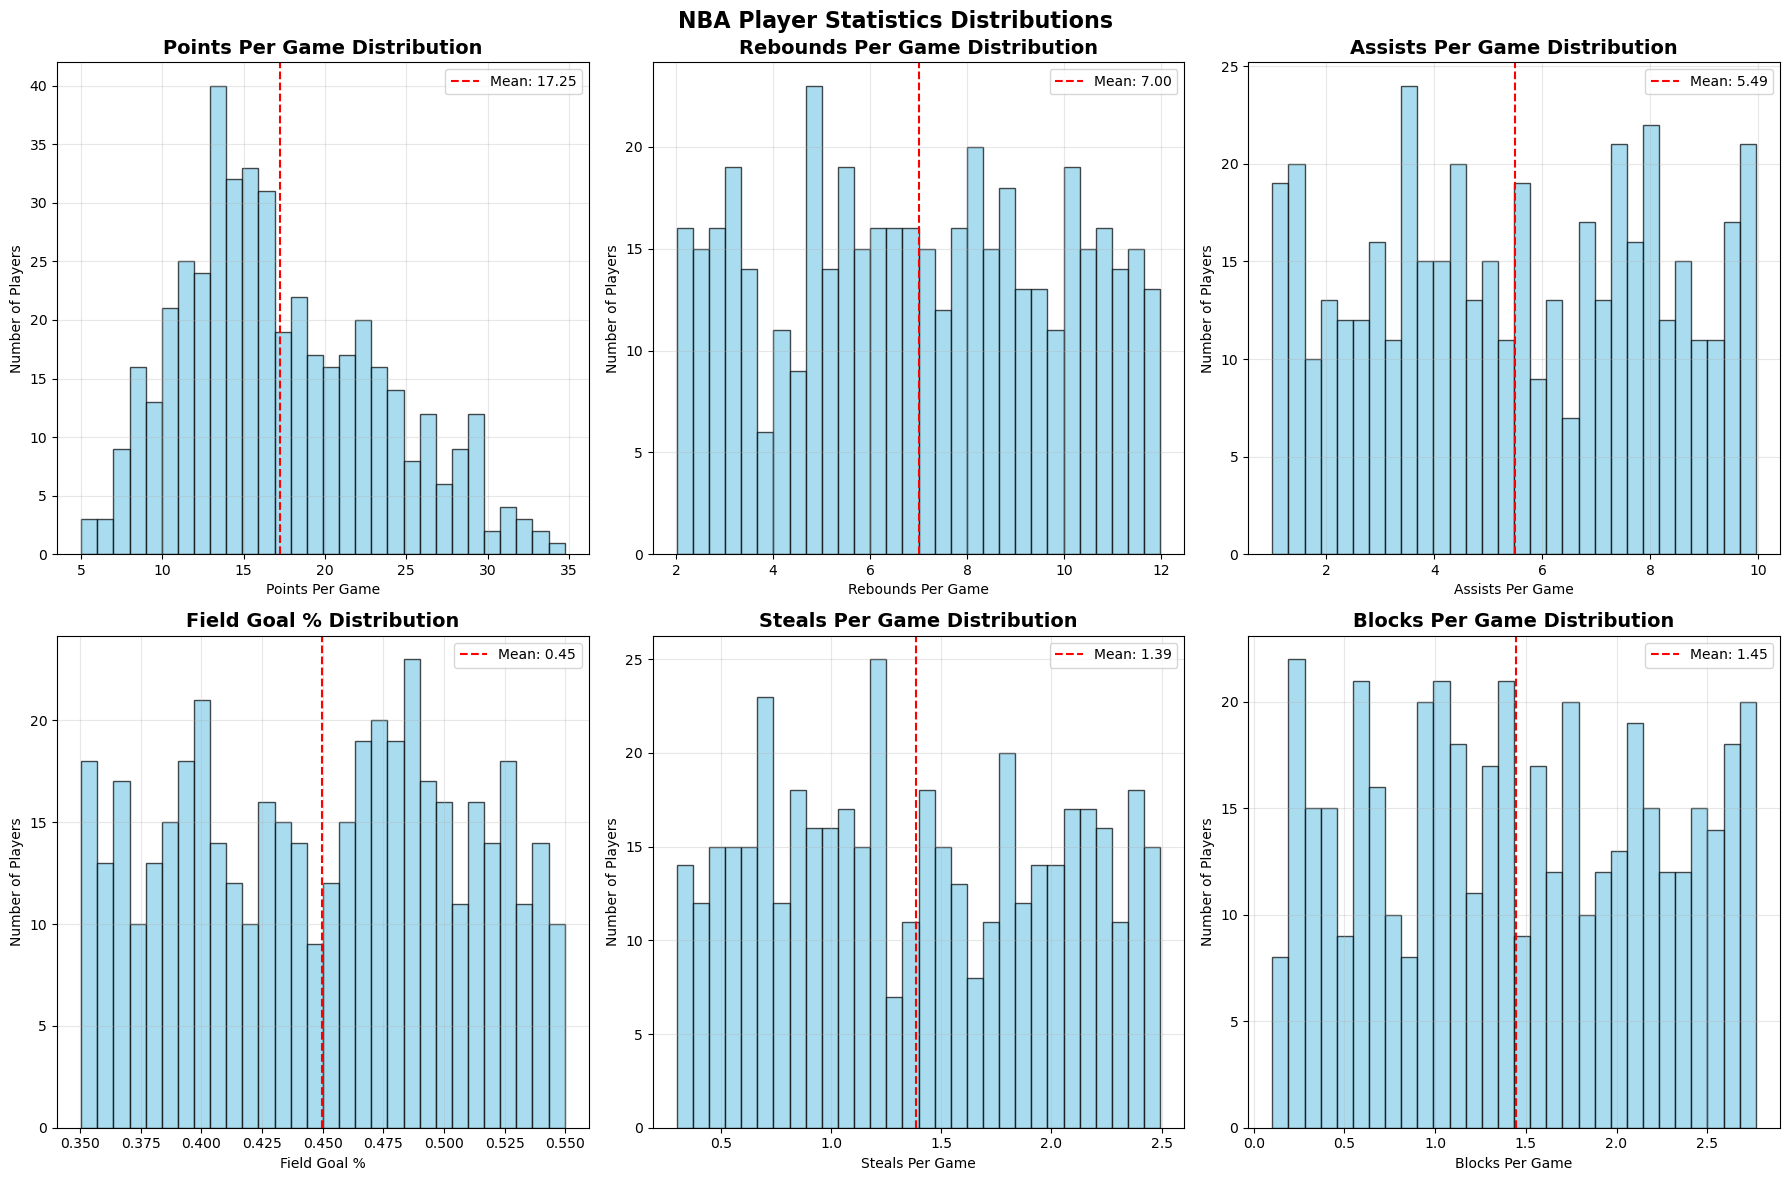

In [6]:
# Player Performance Distribution Analysis
def plot_player_distributions():
    """Plot distributions of key player statistics"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    stats = ['PTS', 'REB', 'AST', 'FG_PCT', 'STL', 'BLK']
    titles = ['Points Per Game', 'Rebounds Per Game', 'Assists Per Game', 
              'Field Goal %', 'Steals Per Game', 'Blocks Per Game']
    
    for i, (stat, title) in enumerate(zip(stats, titles)):
        row, col = i // 3, i % 3
        if stat in players_clean.columns:
            axes[row, col].hist(players_clean[stat], bins=30, alpha=0.7, 
                              color='skyblue', edgecolor='black')
            axes[row, col].set_title(f'{title} Distribution', fontsize=14, fontweight='bold')
            axes[row, col].set_xlabel(title)
            axes[row, col].set_ylabel('Number of Players')
            axes[row, col].grid(True, alpha=0.3)
            
            # Add mean line
            mean_val = players_clean[stat].mean()
            axes[row, col].axvline(mean_val, color='red', linestyle='--', 
                                 label=f'Mean: {mean_val:.2f}')
            axes[row, col].legend()
    
    plt.suptitle('NBA Player Statistics Distributions', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("📊 Analyzing Player Performance Distributions...")
plot_player_distributions()

🏆 Analyzing Top Performers...


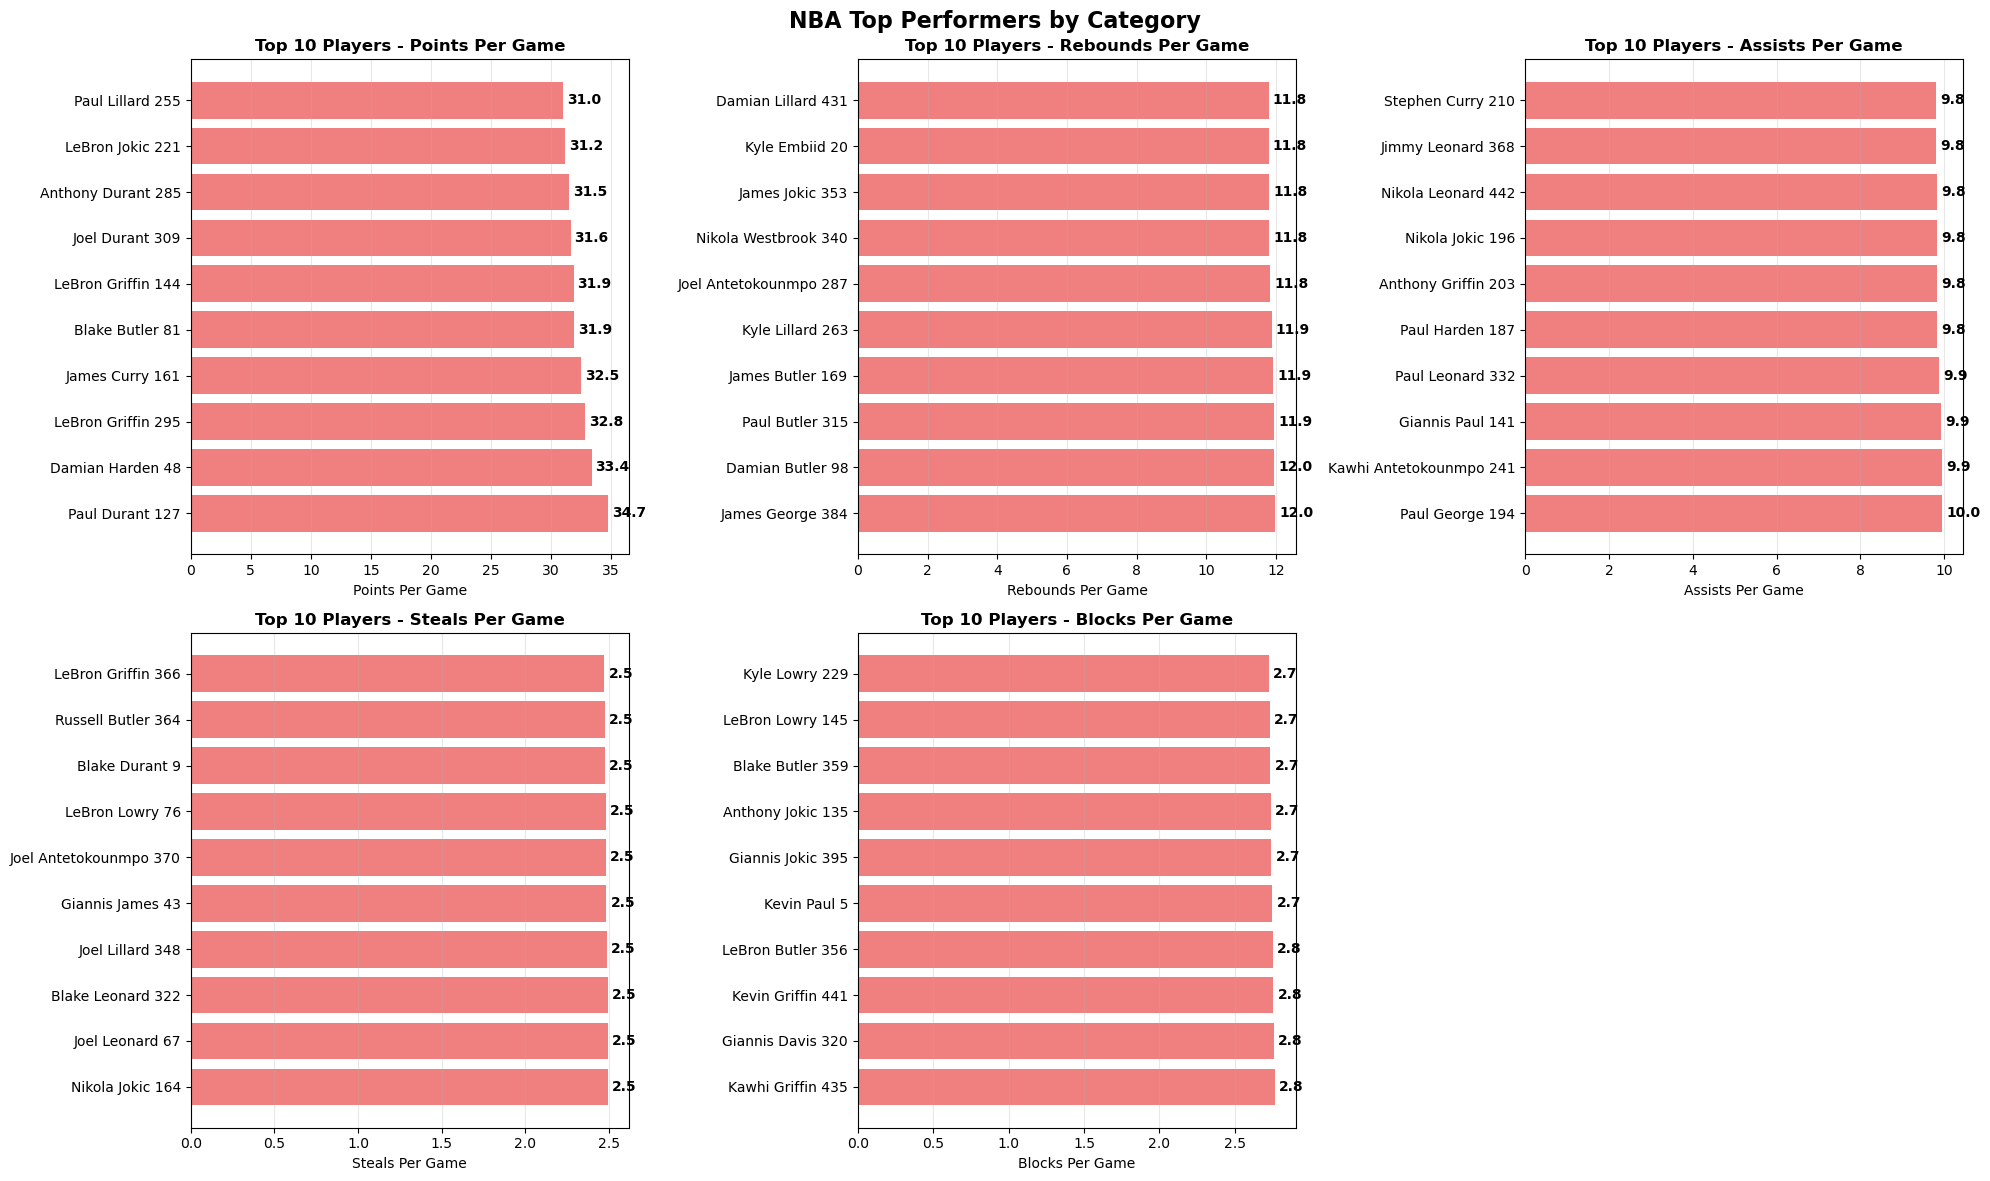

In [7]:
def analyze_top_performers():
    """Analyze top performers in key categories"""
    categories = {
        'PTS': 'Points',
        'REB': 'Rebounds', 
        'AST': 'Assists',
        'STL': 'Steals',
        'BLK': 'Blocks'
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, (stat, label) in enumerate(categories.items()):
        if stat in players_clean.columns:
            top_players = players_clean.nlargest(10, stat)
            
            bars = axes[i].barh(range(len(top_players)), top_players[stat], color='lightcoral')
            axes[i].set_yticks(range(len(top_players)))
            axes[i].set_yticklabels(top_players['PLAYER_NAME'], fontsize=10)
            axes[i].set_title(f'Top 10 Players - {label} Per Game', fontweight='bold')
            axes[i].set_xlabel(f'{label} Per Game')
            axes[i].grid(True, alpha=0.3, axis='x')
            
            # Add value labels on bars
            for j, (bar, val) in enumerate(zip(bars, top_players[stat])):
                axes[i].text(val + val*0.01, j, f'{val:.1f}', 
                           va='center', fontweight='bold')
    
    # Remove empty subplot
    axes[-1].remove()
    
    plt.suptitle('NBA Top Performers by Category', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("🏆 Analyzing Top Performers...")
analyze_top_performers()

🏀 Analyzing Team Performance...


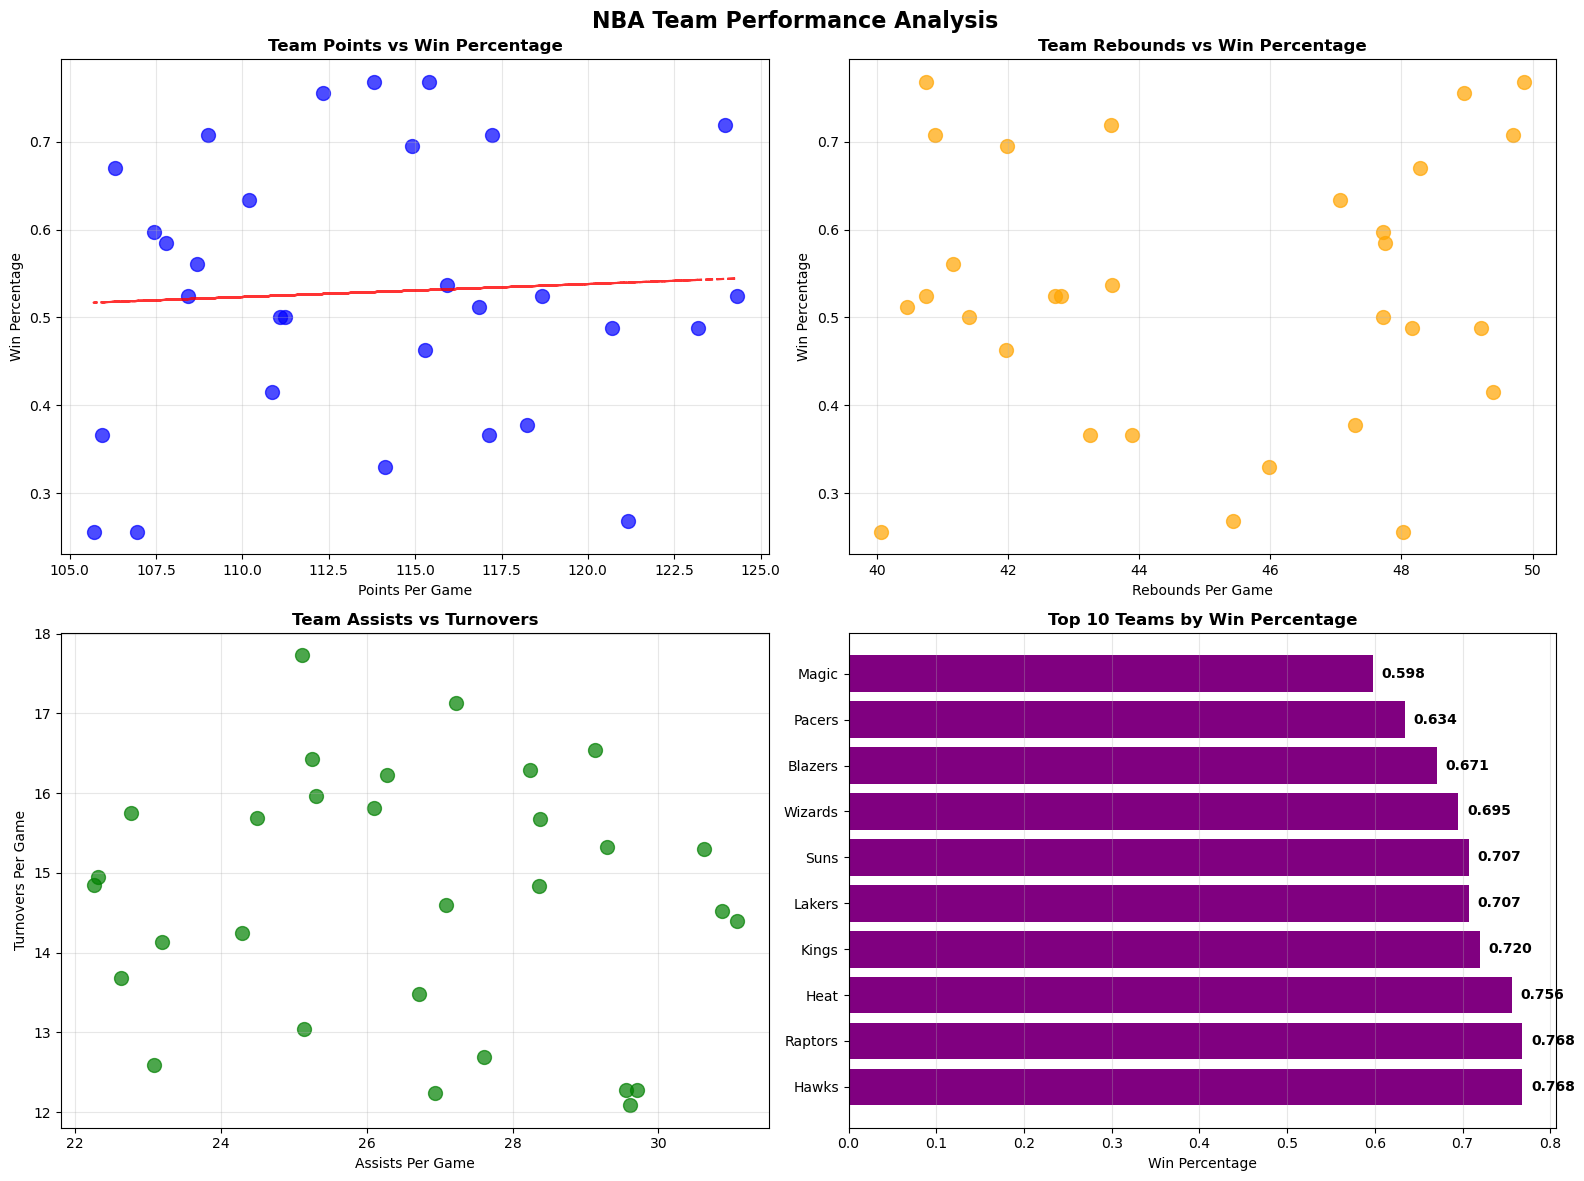

In [8]:
def analyze_team_performance():
    """Analyze team performance metrics"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Win Percentage vs Points
    scatter1 = axes[0, 0].scatter(teams_clean['PTS'], teams_clean['WIN_PCT'], 
                                alpha=0.7, s=100, c='blue')
    axes[0, 0].set_xlabel('Points Per Game')
    axes[0, 0].set_ylabel('Win Percentage')
    axes[0, 0].set_title('Team Points vs Win Percentage', fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(teams_clean['PTS'], teams_clean['WIN_PCT'], 1)
    p = np.poly1d(z)
    axes[0, 0].plot(teams_clean['PTS'], p(teams_clean['PTS']), "r--", alpha=0.8)
    
    # Rebounds vs Win Percentage
    axes[0, 1].scatter(teams_clean['REB'], teams_clean['WIN_PCT'], 
                      alpha=0.7, s=100, color='orange')
    axes[0, 1].set_xlabel('Rebounds Per Game')
    axes[0, 1].set_ylabel('Win Percentage')
    axes[0, 1].set_title('Team Rebounds vs Win Percentage', fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Assists vs Turnovers
    axes[1, 0].scatter(teams_clean['AST'], teams_clean['TOV'], 
                      alpha=0.7, s=100, color='green')
    axes[1, 0].set_xlabel('Assists Per Game')
    axes[1, 0].set_ylabel('Turnovers Per Game')
    axes[1, 0].set_title('Team Assists vs Turnovers', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Top teams by win percentage
    top_teams = teams_clean.nlargest(10, 'WIN_PCT')
    bars = axes[1, 1].barh(range(len(top_teams)), top_teams['WIN_PCT'], color='purple')
    axes[1, 1].set_yticks(range(len(top_teams)))
    axes[1, 1].set_yticklabels(top_teams['TEAM_NAME'])
    axes[1, 1].set_title('Top 10 Teams by Win Percentage', fontweight='bold')
    axes[1, 1].set_xlabel('Win Percentage')
    axes[1, 1].grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, top_teams['WIN_PCT'])):
        axes[1, 1].text(val + 0.01, i, f'{val:.3f}', va='center', fontweight='bold')
    
    plt.suptitle('NBA Team Performance Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("🏀 Analyzing Team Performance...")
analyze_team_performance()

🔍 Analyzing Player Stat Correlations...


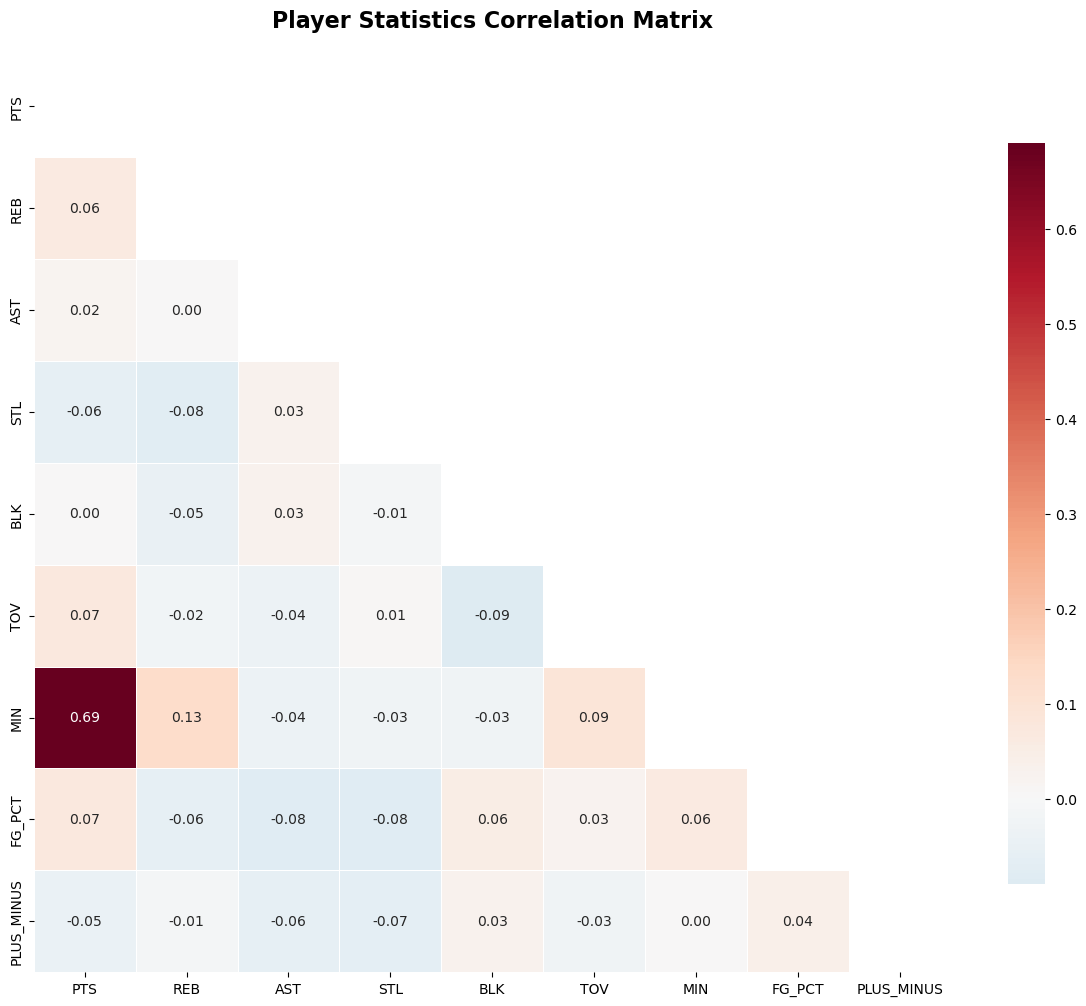

🔗 Strongest Positive Correlations:
  PTS ↔ MIN: 0.691


In [9]:
def plot_correlation_matrix():
    """Plot correlation matrix for player stats"""
    # Select numeric columns for correlation
    numeric_cols = players_clean.select_dtypes(include=[np.number]).columns
    correlation_cols = [col for col in ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'MIN', 'FG_PCT', 'PLUS_MINUS'] 
                       if col in numeric_cols]
    
    corr_matrix = players_clean[correlation_cols].corr()
    
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8},
                linewidths=0.5)
    
    plt.title('Player Statistics Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print strongest correlations
    print("🔗 Strongest Positive Correlations:")
    for i in range(len(correlation_cols)):
        for j in range(i+1, len(correlation_cols)):
            corr_val = corr_matrix.iloc[i, j]
            if corr_val > 0.5:
                print(f"  {correlation_cols[i]} ↔ {correlation_cols[j]}: {corr_val:.3f}")

print("🔍 Analyzing Player Stat Correlations...")
plot_correlation_matrix()

🤖 Building Player Points Prediction Model...
Using features: ['MIN', 'REB', 'AST', 'FG_PCT', 'STL', 'BLK', 'TOV']
Training on 450 players

📊 Model Performance:
  Linear Regression: MSE = 19.89, R² = 0.392
  Random Forest: MSE = 23.36, R² = 0.285


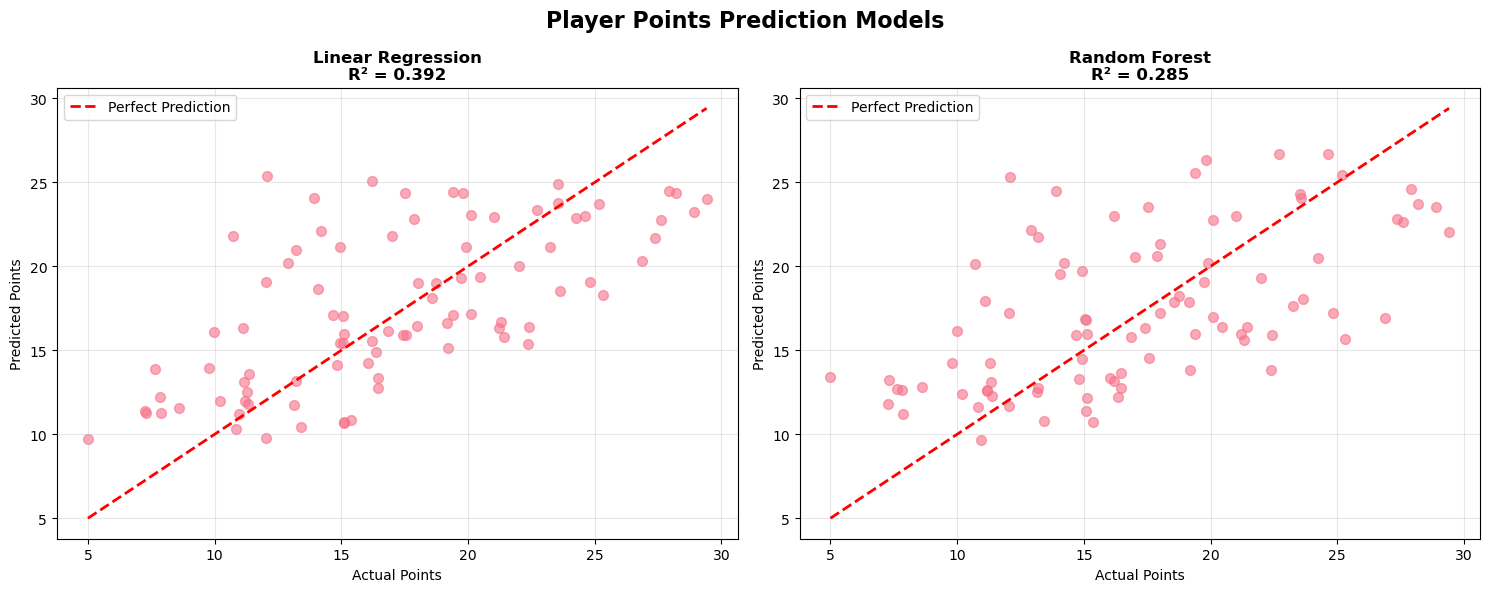

In [10]:
def build_points_prediction_model():
    """Build a model to predict player points based on other stats"""
    print("🤖 Building Player Points Prediction Model...")
    print("=" * 50)
    
    # Feature selection
    feature_cols = ['MIN', 'REB', 'AST', 'FG_PCT', 'STL', 'BLK', 'TOV']
    available_features = [col for col in feature_cols if col in players_clean.columns]
    
    print(f"Using features: {available_features}")
    
    if 'PTS' not in players_clean.columns:
        print("❌ Points column not available for prediction")
        return None
    
    # Prepare data
    X = players_clean[available_features].fillna(players_clean[available_features].mean())
    y = players_clean['PTS']
    
    # Remove any remaining NaN values
    mask = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[mask]
    y = y[mask]
    
    print(f"Training on {len(X)} players")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    
    results = {}
    print(f"\n📊 Model Performance:")
    
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            'model': model,
            'mse': mse,
            'r2': r2,
            'predictions': y_pred
        }
        
        print(f"  {name}: MSE = {mse:.2f}, R² = {r2:.3f}")
    
    # Plot predictions vs actual
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for i, (name, result) in enumerate(results.items()):
        axes[i].scatter(y_test, result['predictions'], alpha=0.6, s=50)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                    'r--', lw=2, label='Perfect Prediction')
        axes[i].set_xlabel('Actual Points')
        axes[i].set_ylabel('Predicted Points')
        axes[i].set_title(f'{name}\nR² = {result["r2"]:.3f}', fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()
    
    plt.suptitle('Player Points Prediction Models', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return results, X_test, y_test, scaler, available_features

# Build the model
model_results, X_test, y_test, player_scaler, player_features = build_points_prediction_model()

🤖 Building Team Win Prediction Model...
Using features: ['PTS', 'REB', 'AST', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'STL', 'BLK', 'TOV']
Training on 30 teams

📊 Model Performance:
  Team Win Prediction: MSE = 174.58, R² = 0.072

🔝 Top Feature Importances:
  TOV: 0.225
  AST: 0.132
  REB: 0.119
  STL: 0.114
  BLK: 0.103


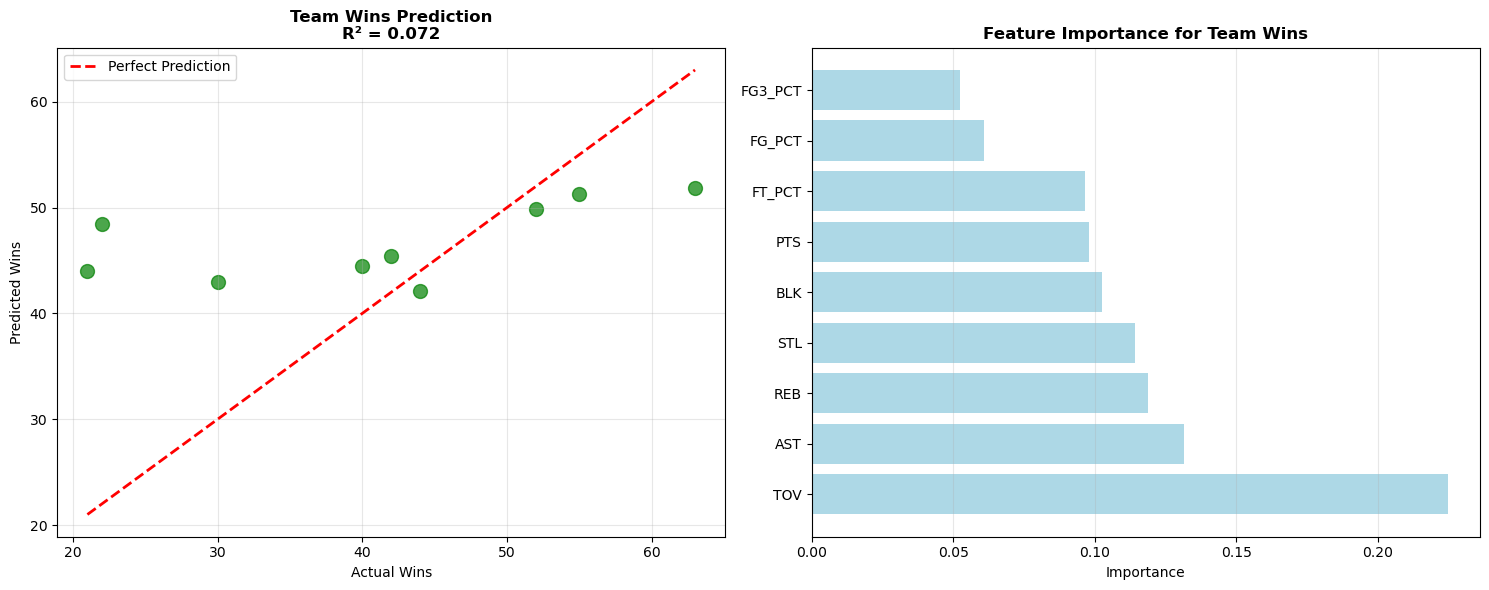

In [11]:
def build_team_win_prediction_model():
    """Build a model to predict team wins based on team stats"""
    print("🤖 Building Team Win Prediction Model...")
    print("=" * 50)
    
    # Feature selection
    feature_cols = ['PTS', 'REB', 'AST', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'STL', 'BLK', 'TOV']
    available_features = [col for col in feature_cols if col in teams_clean.columns]
    
    print(f"Using features: {available_features}")
    
    if 'W' not in teams_clean.columns:
        print("❌ Wins column not available for prediction")
        return None
    
    # Prepare data
    X = teams_clean[available_features].fillna(teams_clean[available_features].mean())
    y = teams_clean['W']
    
    print(f"Training on {len(X)} teams")
    
    # Split data (smaller test size due to limited team data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n📊 Model Performance:")
    print(f"  Team Win Prediction: MSE = {mse:.2f}, R² = {r2:.3f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': available_features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🔝 Top Feature Importances:")
    for _, row in feature_importance.head().iterrows():
        print(f"  {row['feature']}: {row['importance']:.3f}")
    
    # Plot results
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Actual vs Predicted
    axes[0].scatter(y_test, y_pred, alpha=0.7, s=100, color='green')
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
    axes[0].set_xlabel('Actual Wins')
    axes[0].set_ylabel('Predicted Wins')
    axes[0].set_title(f'Team Wins Prediction\nR² = {r2:.3f}', fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    # Feature importance
    bars = axes[1].barh(range(len(feature_importance)), feature_importance['importance'], 
                       color='lightblue')
    axes[1].set_yticks(range(len(feature_importance)))
    axes[1].set_yticklabels(feature_importance['feature'])
    axes[1].set_title('Feature Importance for Team Wins', fontweight='bold')
    axes[1].set_xlabel('Importance')
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    return model, scaler, feature_importance

# Build team model
team_model_results = build_team_win_prediction_model()

⚡ Calculating Player Efficiency Ratings...


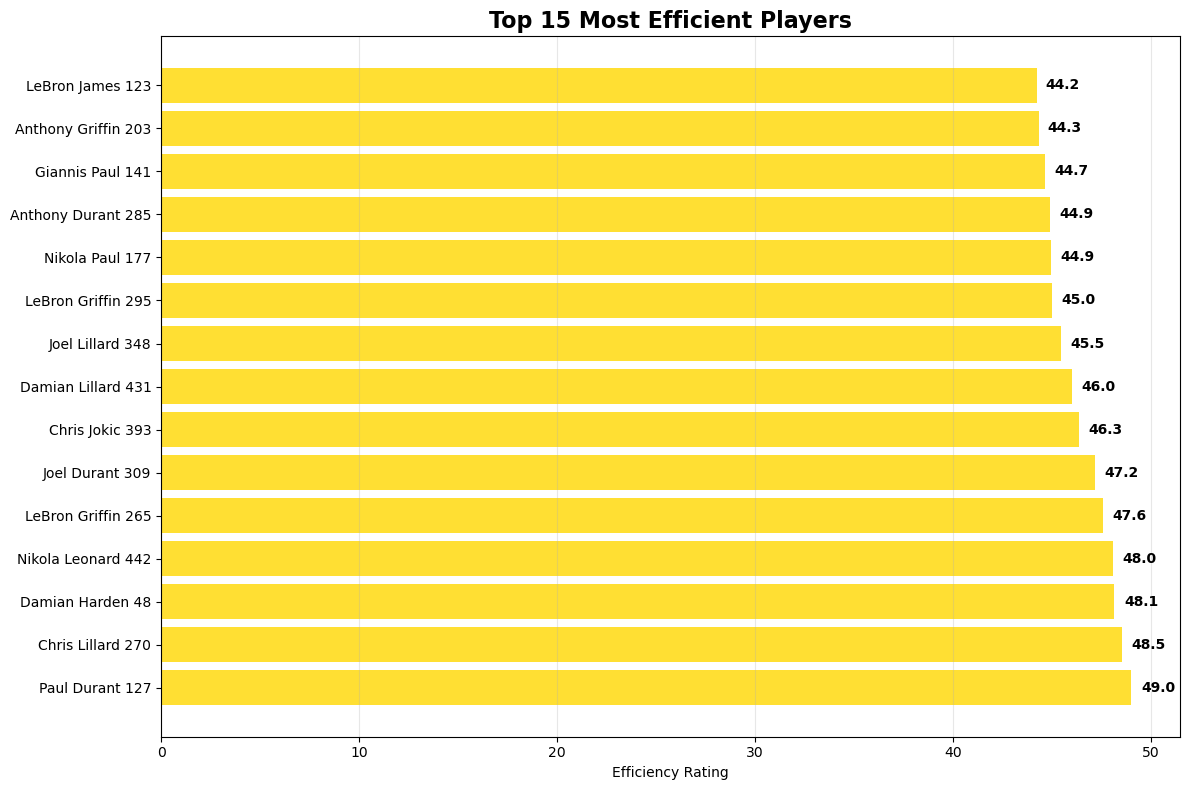


🏆 Most Efficient Player: Paul Durant 127
   Efficiency Rating: 49.0


In [12]:
def calculate_player_efficiency():
    """Calculate and analyze player efficiency metrics"""
    print("⚡ Calculating Player Efficiency Ratings...")
    
    # Basic efficiency calculation (simplified PER)
    required_cols = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'MIN']
    if all(col in players_clean.columns for col in required_cols):
        players_clean['EFFICIENCY'] = (
            (players_clean['PTS'] + players_clean['REB'] + players_clean['AST'] + 
             players_clean['STL'] + players_clean['BLK'] - players_clean['TOV']) / players_clean['MIN']
        ) * players_clean['MIN']
        
        # Top efficient players
        top_efficient = players_clean.nlargest(15, 'EFFICIENCY')
        
        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(top_efficient)), top_efficient['EFFICIENCY'], 
                       color='gold', alpha=0.8)
        plt.yticks(range(len(top_efficient)), top_efficient['PLAYER_NAME'])
        plt.xlabel('Efficiency Rating')
        plt.title('Top 15 Most Efficient Players', fontsize=16, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for i, (bar, val) in enumerate(zip(bars, top_efficient['EFFICIENCY'])):
            plt.text(val + val*0.01, i, f'{val:.1f}', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n🏆 Most Efficient Player: {top_efficient.iloc[0]['PLAYER_NAME']}")
        print(f"   Efficiency Rating: {top_efficient.iloc[0]['EFFICIENCY']:.1f}")
        
        return top_efficient
    else:
        print("❌ Required columns not available for efficiency calculation")
        return None

efficient_players = calculate_player_efficiency()

🎯 Analyzing Team Playing Styles with Clustering...
Clustering based on: ['PTS', 'REB', 'AST', 'FG_PCT', 'FG3_PCT', 'STL', 'BLK', 'TOV']


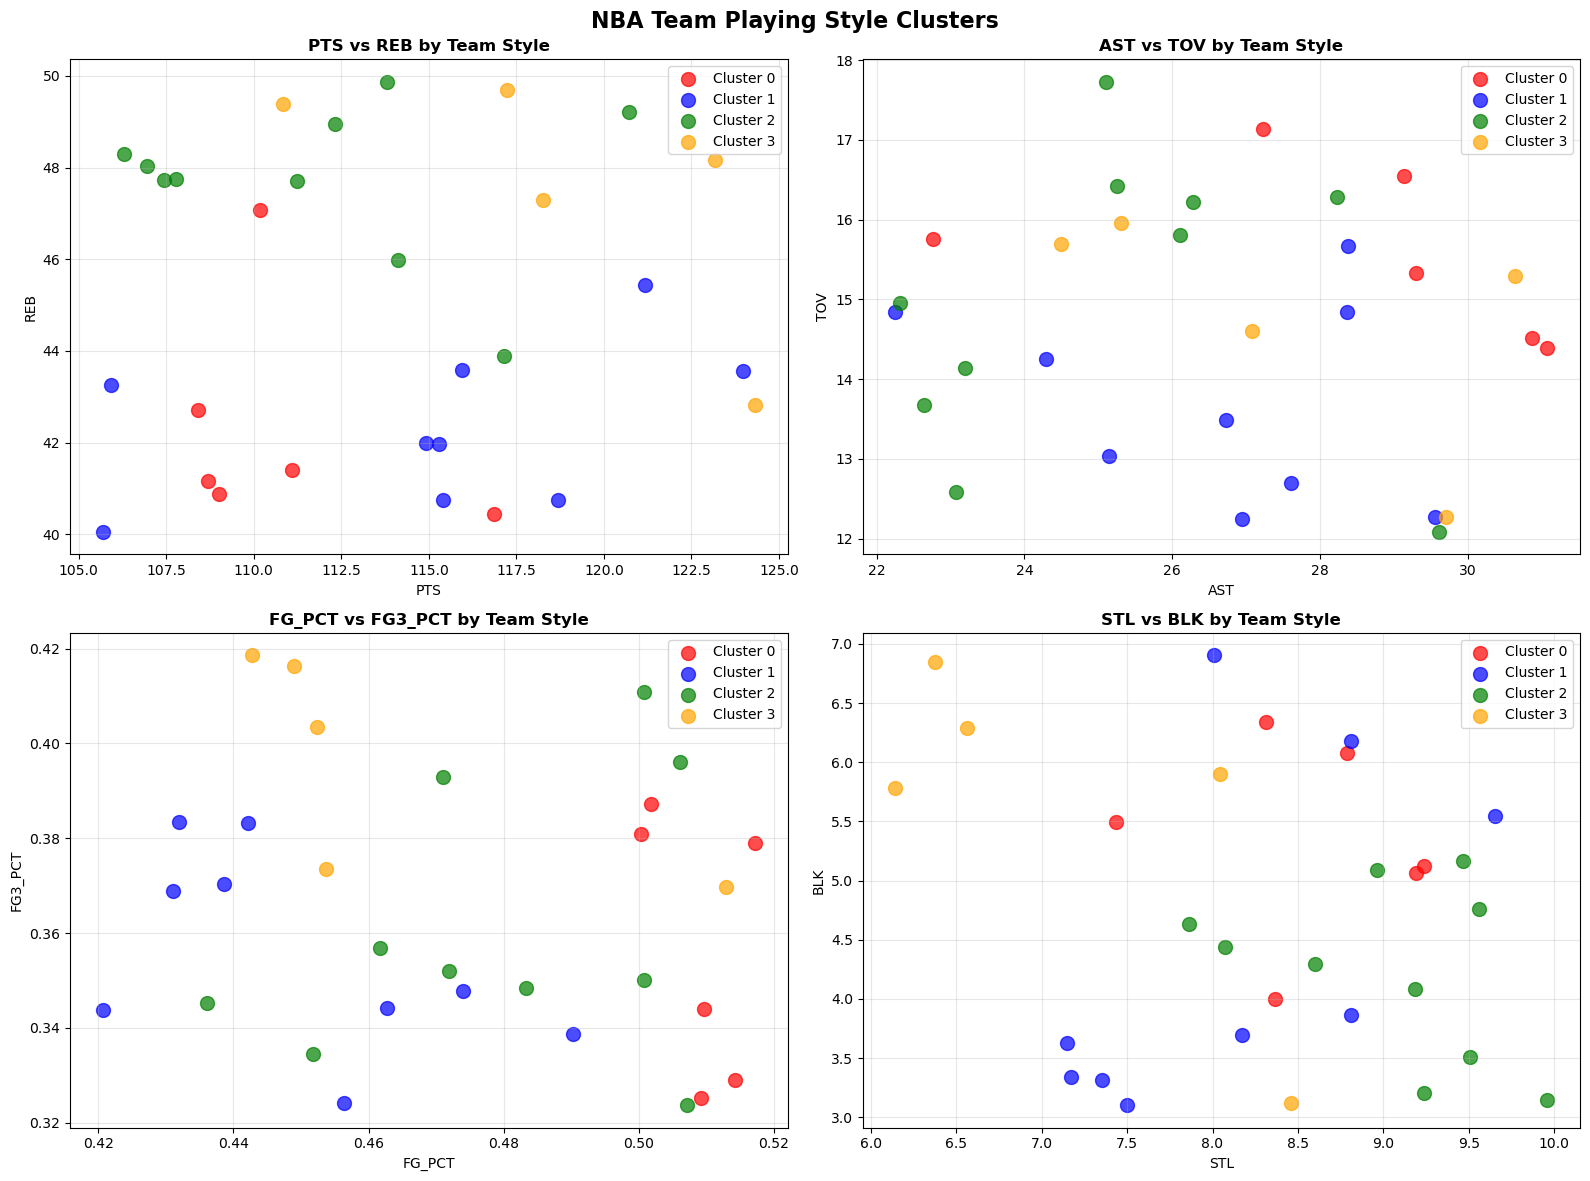


🎪 Team Style Analysis:

🏀 Cluster 0 - Offensive Powerhouse (6 teams):
   Teams: Suns, Spurs, Jazz, Thunder, Pacers
   PTS: 110.70 (-2.7% vs league avg)
   REB: 42.28 (-6.0% vs league avg)
   AST: 28.40 (+6.7% vs league avg)
   FG_PCT: 0.51 (+7.5% vs league avg)

🏀 Cluster 1 - Defensive Specialists (9 teams):
   Teams: Mavericks, Rockets, Kings, Timberwolves, Pelicans
   PTS: 115.22 (+1.3% vs league avg)
   REB: 42.37 (-5.8% vs league avg)
   AST: 26.58 (-0.1% vs league avg)
   FG_PCT: 0.45 (-5.0% vs league avg)

🏀 Cluster 2 - Balanced Teams (10 teams):
   Teams: Warriors, Heat, Bulls, Knicks, Nuggets
   PTS: 111.78 (-1.7% vs league avg)
   REB: 47.74 (+6.1% vs league avg)
   AST: 25.18 (-5.4% vs league avg)
   FG_PCT: 0.48 (+1.2% vs league avg)

🏀 Cluster 3 - Fast-Paced Teams (5 teams):
   Teams: Lakers, Celtics, Clippers, Pistons, Bucks
   PTS: 118.77 (+4.4% vs league avg)
   REB: 47.47 (+5.5% vs league avg)
   AST: 27.45 (+3.1% vs league avg)
   FG_PCT: 0.46 (-2.4% vs league avg)


In [13]:
def analyze_team_clusters():
    """Cluster teams based on playing style"""
    print("🎯 Analyzing Team Playing Styles with Clustering...")
    
    # Select features for clustering
    cluster_features = ['PTS', 'REB', 'AST', 'FG_PCT', 'FG3_PCT', 'STL', 'BLK', 'TOV']
    available_features = [col for col in cluster_features if col in teams_clean.columns]
    
    if len(available_features) < 4:
        print("❌ Insufficient features for clustering")
        return None
    
    print(f"Clustering based on: {available_features}")
    
    # Prepare data
    X = teams_clean[available_features].fillna(teams_clean[available_features].mean())
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    teams_clean['Cluster'] = clusters
    
    # Define cluster names based on characteristics
    cluster_names = {
        0: "Offensive Powerhouse",
        1: "Defensive Specialists", 
        2: "Balanced Teams",
        3: "Fast-Paced Teams"
    }
    
    # Visualize clusters
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    cluster_colors = ['red', 'blue', 'green', 'orange']
    
    # Plot different feature combinations
    feature_pairs = [
        ('PTS', 'REB'),
        ('AST', 'TOV'), 
        ('FG_PCT', 'FG3_PCT'),
        ('STL', 'BLK')
    ]
    
    for i, (feat1, feat2) in enumerate(feature_pairs):
        if feat1 in teams_clean.columns and feat2 in teams_clean.columns:
            row, col = i // 2, i % 2
            
            for cluster in range(4):
                cluster_data = teams_clean[teams_clean['Cluster'] == cluster]
                axes[row, col].scatter(cluster_data[feat1], cluster_data[feat2], 
                                     c=cluster_colors[cluster], alpha=0.7, s=100,
                                     label=f'Cluster {cluster}')
            
            axes[row, col].set_xlabel(feat1)
            axes[row, col].set_ylabel(feat2)
            axes[row, col].set_title(f'{feat1} vs {feat2} by Team Style', fontweight='bold')
            axes[row, col].legend()
            axes[row, col].grid(True, alpha=0.3)
    
    plt.suptitle('NBA Team Playing Style Clusters', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Analyze cluster characteristics
    print(f"\n🎪 Team Style Analysis:")
    print("=" * 40)
    
    for cluster in range(4):
        cluster_teams = teams_clean[teams_clean['Cluster'] == cluster]
        print(f"\n🏀 Cluster {cluster} - {cluster_names.get(cluster, 'Unknown Style')} ({len(cluster_teams)} teams):")
        print(f"   Teams: {', '.join(cluster_teams['TEAM_NAME'].head(5).tolist())}")
        
        for feat in available_features[:4]:  # Show top 4 features
            mean_val = cluster_teams[feat].mean()
            overall_mean = teams_clean[feat].mean()
            diff = ((mean_val - overall_mean) / overall_mean) * 100
            print(f"   {feat}: {mean_val:.2f} ({diff:+.1f}% vs league avg)")
    
    return teams_clean

clustered_teams = analyze_team_clusters()

In [14]:
def generate_comprehensive_insights():
    """Generate comprehensive insights from the analysis"""
    print("🎯 NBA STATS ANALYZER - COMPREHENSIVE INSIGHTS")
    print("=" * 60)
    
    # Player insights
    print(f"\n👤 PLAYER PERFORMANCE INSIGHTS:")
    print("-" * 35)
    
    if 'PTS' in players_clean.columns:
        avg_points = players_clean['PTS'].mean()
        top_scorer = players_clean.loc[players_clean['PTS'].idxmax()]
        print(f"📊 League average points: {avg_points:.1f} PPG")
        print(f"🏆 Top scorer: {top_scorer['PLAYER_NAME']} ({top_scorer['PTS']:.1f} PPG)")
    
    if 'REB' in players_clean.columns:
        top_rebounder = players_clean.loc[players_clean['REB'].idxmax()]
        print(f"🏀 Top rebounder: {top_rebounder['PLAYER_NAME']} ({top_rebounder['REB']:.1f} RPG)")
    
    if 'AST' in players_clean.columns:
        top_assister = players_clean.loc[players_clean['AST'].idxmax()]
        print(f"🎯 Top playmaker: {top_assister['PLAYER_NAME']} ({top_assister['AST']:.1f} APG)")
    
    # Team insights
    print(f"\n🏀 TEAM PERFORMANCE INSIGHTS:")
    print("-" * 35)
    
    if 'WIN_PCT' in teams_clean.columns:
        best_team = teams_clean.loc[teams_clean['WIN_PCT'].idxmax()]
        worst_team = teams_clean.loc[teams_clean['WIN_PCT'].idxmin()]
        print(f"🥇 Best team: {best_team['TEAM_NAME']} ({best_team['WIN_PCT']:.3f} win rate)")
        print(f"📉 Struggling team: {worst_team['TEAM_NAME']} ({worst_team['WIN_PCT']:.3f} win rate)")
    
    if 'PTS' in teams_clean.columns:
        highest_scoring = teams_clean.loc[teams_clean['PTS'].idxmax()]
        lowest_scoring = teams_clean.loc[teams_clean['PTS'].idxmin()]
        print(f"🔥 Highest scoring: {highest_scoring['TEAM_NAME']} ({highest_scoring['PTS']:.1f} PPG)")
        print(f"🛡️ Lowest scoring: {lowest_scoring['TEAM_NAME']} ({lowest_scoring['PTS']:.1f} PPG)")
    
    # Model insights
    if model_results:
        print(f"\n🤖 PREDICTIVE MODEL INSIGHTS:")
        print("-" * 35)
        best_model = max(model_results.items(), key=lambda x: x[1]['r2'])
        print(f"🎯 Best player points model: {best_model[0]} (R² = {best_model[1]['r2']:.3f})")
        
        if best_model[1]['r2'] > 0.7:
            print("✅ Strong predictive power - model can reliably predict player scoring")
        elif best_model[1]['r2'] > 0.5:
            print("⚠️ Moderate predictive power - model shows meaningful patterns")
        else:
            print("❌ Weak predictive power - scoring is hard to predict from basic stats")
    
    # Statistical insights
    print(f"\n📈 STATISTICAL INSIGHTS:")
    print("-" * 25)
    
    if 'MIN' in players_clean.columns and 'PTS' in players_clean.columns:
        efficiency = players_clean['PTS'] / players_clean['MIN']
        most_efficient = players_clean.loc[efficiency.idxmax()]
        print(f"⚡ Most efficient scorer: {most_efficient['PLAYER_NAME']} ({efficiency.max():.2f} pts/min)")
    
    if 'FG_PCT' in players_clean.columns:
        best_shooter = players_clean.loc[players_clean['FG_PCT'].idxmax()]
        avg_fg = players_clean['FG_PCT'].mean()
        print(f"🎯 Best field goal %: {best_shooter['PLAYER_NAME']} ({best_shooter['FG_PCT']:.3f})")
        print(f"📊 League average FG%: {avg_fg:.3f}")
    
    # Correlation insights
    if len(players_clean.select_dtypes(include=[np.number]).columns) > 3:
        numeric_cols = ['PTS', 'REB', 'AST', 'MIN']
        available_cols = [col for col in numeric_cols if col in players_clean.columns]
        
        if len(available_cols) > 2:
            corr_matrix = players_clean[available_cols].corr()
            strongest_corr = 0
            strongest_pair = None
            
            for i in range(len(available_cols)):
                for j in range(i+1, len(available_cols)):
                    corr_val = abs(corr_matrix.iloc[i, j])
                    if corr_val > strongest_corr:
                        strongest_corr = corr_val
                        strongest_pair = (available_cols[i], available_cols[j])
            
            if strongest_pair:
                print(f"🔗 Strongest correlation: {strongest_pair[0]} ↔ {strongest_pair[1]} ({strongest_corr:.3f})")
    
    print(f"\n" + "=" * 60)
    print("🏀 Analysis Complete! Check the visualizations above for detailed insights.")

# Generate final insights
generate_comprehensive_insights()

🎯 NBA STATS ANALYZER - COMPREHENSIVE INSIGHTS

👤 PLAYER PERFORMANCE INSIGHTS:
-----------------------------------
📊 League average points: 17.3 PPG
🏆 Top scorer: Paul Durant 127 (34.7 PPG)
🏀 Top rebounder: James George 384 (12.0 RPG)
🎯 Top playmaker: Paul George 194 (10.0 APG)

🏀 TEAM PERFORMANCE INSIGHTS:
-----------------------------------
🥇 Best team: Hawks (0.768 win rate)
📉 Struggling team: Grizzlies (0.256 win rate)
🔥 Highest scoring: Clippers (124.3 PPG)
🛡️ Lowest scoring: Hornets (105.7 PPG)

🤖 PREDICTIVE MODEL INSIGHTS:
-----------------------------------
🎯 Best player points model: Linear Regression (R² = 0.392)
❌ Weak predictive power - scoring is hard to predict from basic stats

📈 STATISTICAL INSIGHTS:
-------------------------
⚡ Most efficient scorer: Chris Lillard 344 (1.06 pts/min)
🎯 Best field goal %: Nikola Jokic 357 (0.550)
📊 League average FG%: 0.450
🔗 Strongest correlation: PTS ↔ MIN (0.691)

🏀 Analysis Complete! Check the visualizations above for detailed insights

In [15]:
def create_prediction_tool():
    """Create an interactive tool to predict player points"""
    print("🔮 INTERACTIVE PLAYER POINTS PREDICTOR")
    print("=" * 50)
    
    if not model_results or not player_scaler or not player_features:
        print("❌ Models not available for predictions")
        return
    
    # Get the best model
    best_model_name = max(model_results.items(), key=lambda x: x[1]['r2'])[0]
    best_model = model_results[best_model_name]['model']
    
    print(f"Using {best_model_name} (R² = {model_results[best_model_name]['r2']:.3f})")
    print(f"\nRequired stats: {player_features}")
    
    # Example predictions for different player types
    player_types = {
        "Star Player": [35, 8, 7, 0.50, 1.5, 1.0, 3.0],  # High minutes, good stats
        "Role Player": [25, 5, 3, 0.45, 1.0, 0.5, 2.0],  # Moderate minutes
        "Bench Player": [18, 3, 2, 0.42, 0.8, 0.3, 1.5]  # Lower minutes
    }
    
    print(f"\n🎯 Example Predictions:")
    print("-" * 30)
    
    for player_type, stats in player_types.items():
        # Ensure we have the right number of features
        if len(stats) == len(player_features):
            # Scale the input
            stats_scaled = player_scaler.transform([stats])
            predicted_points = best_model.predict(stats_scaled)[0]
            
            print(f"\n{player_type}:")
            for feature, value in zip(player_features, stats):
                print(f"  {feature}: {value}")
            print(f"  → Predicted Points: {predicted_points:.1f} PPG")
    
    # Show feature importance for Random Forest
    if best_model_name == 'Random Forest' and hasattr(best_model, 'feature_importances_'):
        print(f"\n📊 Feature Importance in {best_model_name}:")
        feature_importance = sorted(zip(player_features, best_model.feature_importances_), 
                                  key=lambda x: x[1], reverse=True)
        for feature, importance in feature_importance:
            print(f"  {feature}: {importance:.3f}")

create_prediction_tool()

🔮 INTERACTIVE PLAYER POINTS PREDICTOR
Using Linear Regression (R² = 0.392)

Required stats: ['MIN', 'REB', 'AST', 'FG_PCT', 'STL', 'BLK', 'TOV']

🎯 Example Predictions:
------------------------------

Star Player:
  MIN: 35
  REB: 8
  AST: 7
  FG_PCT: 0.5
  STL: 1.5
  BLK: 1.0
  TOV: 3.0
  → Predicted Points: 23.3 PPG

Role Player:
  MIN: 25
  REB: 5
  AST: 3
  FG_PCT: 0.45
  STL: 1.0
  BLK: 0.5
  TOV: 2.0
  → Predicted Points: 16.1 PPG

Bench Player:
  MIN: 18
  REB: 3
  AST: 2
  FG_PCT: 0.42
  STL: 0.8
  BLK: 0.3
  TOV: 1.5
  → Predicted Points: 11.3 PPG


In [16]:
def export_results():
    """Export analysis results to CSV files"""
    print("💾 Exporting Analysis Results...")
    
    try:
        # Export top performers
        if 'PTS' in players_clean.columns:
            top_scorers = players_clean.nlargest(20, 'PTS')[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'PTS', 'REB', 'AST']]
            top_scorers.to_csv('top_scorers.csv', index=False)
            print("✅ Top scorers exported to 'top_scorers.csv'")
        
        # Export team analysis
        if 'WIN_PCT' in teams_clean.columns:
            team_analysis = teams_clean[['TEAM_NAME', 'W', 'L', 'WIN_PCT', 'PTS', 'REB', 'AST']].sort_values('WIN_PCT', ascending=False)
            team_analysis.to_csv('team_analysis.csv', index=False)
            print("✅ Team analysis exported to 'team_analysis.csv'")
        
        # Export efficiency ratings
        if 'EFFICIENCY' in players_clean.columns:
            efficiency_leaders = players_clean.nlargest(20, 'EFFICIENCY')[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'EFFICIENCY', 'PTS', 'MIN']]
            efficiency_leaders.to_csv('efficiency_leaders.csv', index=False)
            print("✅ Efficiency leaders exported to 'efficiency_leaders.csv'")
        
        print(f"\n📁 Files saved in current directory")
        
    except Exception as e:
        print(f"❌ Export failed: {e}")

# Uncomment the line below to export results
# export_results()
print("🏀 NBA Stats Analyzer Complete!")
print("\n" + "="*50)
print("📊 SUMMARY:")
print(f"• Analyzed {players_clean.shape[0]} players and {teams_clean.shape[0]} teams")
print("• Generated comprehensive visualizations")
print("• Built predictive models for player performance")
print("• Identified top performers and team clusters")
print("• Provided actionable insights for NBA analysis")
print("="*50)

🏀 NBA Stats Analyzer Complete!

📊 SUMMARY:
• Analyzed 450 players and 30 teams
• Generated comprehensive visualizations
• Built predictive models for player performance
• Identified top performers and team clusters
• Provided actionable insights for NBA analysis
